<span style="font-family:Helvetica; color:gray">These exercise materials provided to you as a student of Aalto University are protected by copyright. You are authorized to use these materials for your personal educational purposes, including completing the exercises and submitting them for grading. You are prohibited from reproducing, distributing, displaying, or sharing any portion of these materials in any form, including, but not limited to, posting on the internet or other forms of electronic communication. Aalto University reserves all rights in the exercise materials.</span>


## Exercise 3: Big Data

In this exercise, you will develop a more concrete understanding of the characteristics of big data outlined in Section 2.3 of [*Bit By Bit: Social Research in the Digital Age*](https://www.bitbybitbook.com/en/1st-ed/observing-behavior/characteristics/), as you explore a **synthetic climate discussion data set** we provide for you. The idea is for you to get a feel of how to go about studying people's behavior on social media, as you learn to think about the merits and caveats of using digital trace data for research.

To get points from this exercise, you need to answer ten questions on A+. Some of them are just multiple-choice questions; for the others, you need to extract information from the data set, following the instructions given in this notebook. **Your implementation in this notebook will not be assessed; you only need to complete the implementation in order to answer the questions on A+.**

In [1]:
import json
from datetime import datetime, timedelta
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 13.5})

Fontconfig error: Cannot load default config file: No such file: (null)


The following code should read the data from the `dataset.jsonl` file into the `data` variable and the user information from `userinfo.jsonl` to `users` variable, if you have downloaded it from A+ and uploaded it to the directory that contains this notebook. 

The data will be accessible as a list of JSON objects, where each JSON object stores the information of a single original post. We here show an example for fetching post from one of the JSON objects. 

In [2]:
data = []
users = []

# Read data from file into a list of JSON objects
with open("dataset.jsonl") as fdata:
    for line in fdata:
        data.append(json.loads(line))

# Read user from file into a list of JSON objects
with open("userinfo.jsonl") as fdata:
    for line in fdata:
        users.append(json.loads(line))

# Print out the User ID, timestamp, and text of a post.
idx = 50
print('User ID: %d' % data[idx]['user_id'])
print('Post timestamp: %s' % data[idx]['date'])
print('Post text: %s' % data[idx]['text'])

User ID: 3561110752093283767
Post timestamp: 2024-03-04T20:34:09.000Z
Post text: the disarming case to act right now on climate change | greta thunberg <url>


### Ten Characteristics of Big Data
#### Big 
- **Calculate the time span of the data set (in days).**  
(Hint: For this exercise and the remaining ones, it's best to convert the post timestamps to `datetime` objects, using the [`strptime`](https://www.programiz.com/python-programming/datetime/strptime) method with format string `'%Y-%m-%dT%H:%M:%S.000Z'`. You can then manipulate the `datetime` objects directly using `min()`, `max()`, and the `-` operator. Use `obj.total_seconds()` to convert a `datetime` object into seconds.)
- **Calculate the total number of post records in the data set.**
- **Answer question 3.2.1 on A+.**

In [43]:
import copy
# Your code here.
dataNew = copy.deepcopy(data)

for dataPoint in dataNew:
    dataPoint['date'] = datetime.strptime(dataPoint['date'], '%Y-%m-%dT%H:%M:%S.000Z')

onlyDates = [dataPoint['date'] for dataPoint in dataNew]

print(dataNew[0:5])
print(users[0:2])

[{'user_id': 18224287041377074931, 'date': datetime.datetime(2024, 3, 1, 5, 22, 51), 'text': '@USER @USER @USER the fact that you think climate change is an actual emergency is a disgrace. #climatestrike #climatechangeisreal', 'id_orig': 18224287041377074931, 'repost': False}, {'user_id': 18224287041377074931, 'date': datetime.datetime(2024, 3, 1, 16, 20, 32), 'text': "@USER @USER @USER the only way to stop the climate change emergency is to take the money from all the rich. that's what a green new deal will do. it's the best way to tackle the climate emergency.", 'id_orig': 18224287041377074931, 'repost': False}, {'user_id': 18224287041377074931, 'date': datetime.datetime(2024, 3, 1, 19, 3, 59), 'text': "@USER @USER @USER @USER the fact that you are so concerned about global warming is so pathetic. i can't believe you actually think you can change the climate. #climatecrisis", 'id_orig': 18224287041377074931, 'repost': False}, {'user_id': 18224287041377074931, 'date': datetime.datetim

In [66]:
# Question 3.2.1

earliest_date = min(onlyDates)
latest_date = max(onlyDates)
print("Earliest date:", earliest_date) 
print("Latest date:", latest_date)   

timedelta = latest_date - earliest_date
print(timedelta)
total_seconds = timedelta.total_seconds()
print("Total seconds:", total_seconds)

total_days = total_seconds/86400 
print("Total days:",total_days)
totalNumberOfPosts = len(dataNew)
print("Total number of posts:", totalNumberOfPosts)
print("Average number of posts made per day:", totalNumberOfPosts/total_days)

Earliest date: 2024-03-01 00:00:01
Latest date: 2024-03-10 23:59:54
9 days, 23:59:53
Total seconds: 863993.0
Total days: 9.999918981481482
Total number of posts: 131797
Average number of posts made per day: 13179.806780841975


#### Always-on
- **Find the maximum time gap (in seconds) between two consecutively collected posts.**  
(Hint: Use `sorted(dates)` to sort the dates, and go through the sorted dates to find the maximum gap.)
- **Answer question 3.2.2 on A+.**

In [29]:
# Your code here.

sortedDates = sorted(onlyDates)
#print(sortedDates[0:3])
seconds_diff_list = []

for i in range(len(sortedDates)-1):
    timedelta = sortedDates[i+1] - sortedDates[i]
    seconds_diff_list.append(timedelta.total_seconds())

print("Maximum seconds between any two consecutively collected posts:",max(seconds_diff_list))

Maximum seconds between any two consecutively collected posts: 86.0


#### Non-reactive
**Answer question 3.2.3 on A+.**

#### Incomplete
**Answer question 3.2.4 on A+.**

#### Nonrepresentative
- **Plot the age distribution of users in the data.**   
(Hint: You can use the [`plt.hist`](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.hist.html) function, where you have ages on the x axis, and the number of users of each age on the y axis.)
- **Plot the number of posts posted by users of each age.**  
(Hint: You can use the [`plt.hist`](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.hist.html) function, where you have ages on the x axis, and the number of posts by users of each age on the y axis.)  
(Caveat: This approach of inspecting the total number of posts posted by each age group is likely not optimal in real analysis. In real analysis, to get a sense of average user activity by age, you might want to plot the average number of posts posted by users of each age.)
- **Answer question 3.2.5 on A+.**

(Think about it: what bias will it potentially bring to the analysis of climate discussions?)

Text(0.5, 1.0, 'Number of posts by age')

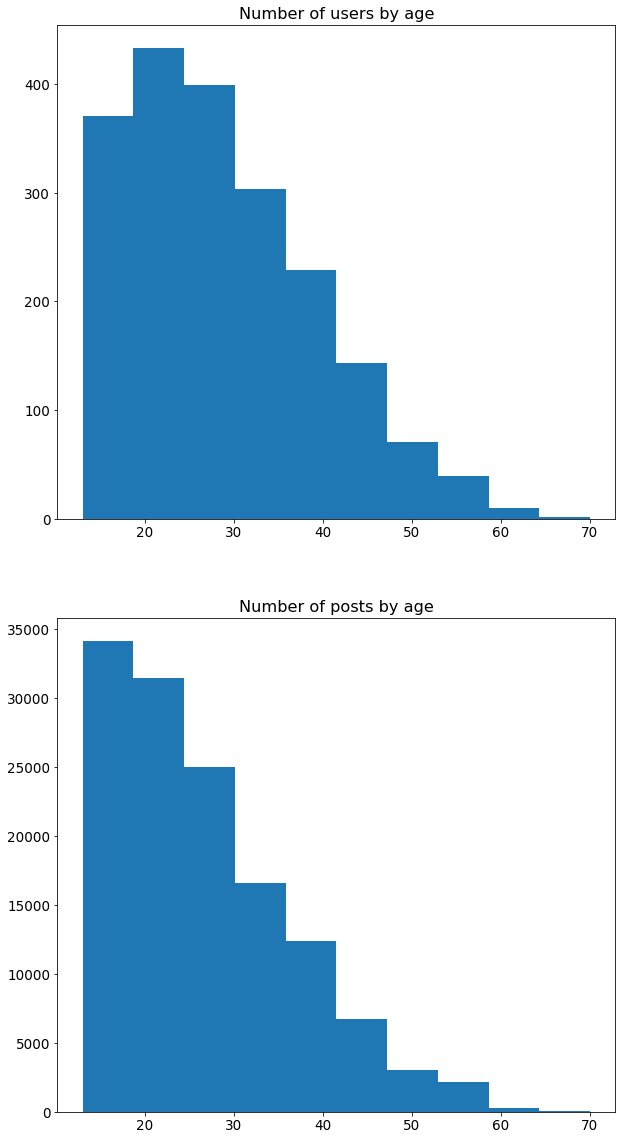

In [41]:
# Your code here.

onlyAge = sorted([user['age'] for user in users])
onlyAgeUnique = list(set(sorted([user['age'] for user in users])))

def findAgeOfUserByID(users, user_id):
    for user in users:
        if (user['id'] == user_id):
            return user['age']
        
postByAge = [findAgeOfUserByID(users, dataPoint['user_id']) for dataPoint in dataNew]

plt.figure(figsize=(10, 20))
plt.subplot(2,1,1)
plt.hist(onlyAge)
plt.title("Number of users by age")

plt.subplot(2,1,2)
plt.hist(postByAge)
plt.title("Number of posts by age")

#### Drifting
- **Find the two most used hashtags in the data.**  
(Hint: For this exercise, the following process will suffice for counting the hashtags: for each post text, use `text.split()` to split it into tokens; if the token starts with `#`, count it as a hashtag.)  
(Note: For real-world data, you might need to do more text cleaning, for example you might need to remove the non-`#` punctuations before tokenization.)
- **Plot the activity of these two hashtags over time.**  
(Hint: You can use the [`plt.plot`](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.plot.html) function to plot a curve for each hashtag, where you have days on the x axis, and the number of posts with this hashtag posted on each day on the y axis. Use `obj.strftime('%Y-%m-%d')` to get the day of a `datetime` object.)
- **Answer question 3.2.6 on A+.**

[('#climatechange', 20873), ('#ipcc', 15486)]


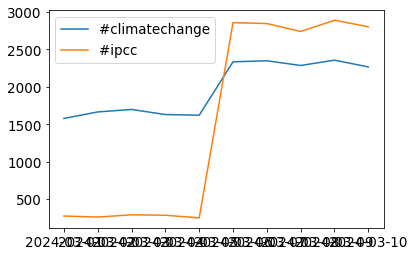

In [63]:
import collections
# Your code here.
def flatten(lst):
    flattened_list = []
    for element in lst:
        if isinstance(element, list):
            flattened_list.extend(flatten(element))
        else:
            flattened_list.append(element)
    return flattened_list

allHashTags = flatten([[token for token in dataPoint['text'].split() if token.startswith('#')] for dataPoint in dataNew])
#print(allHashTags[0:10])
print(collections.Counter(allHashTags).most_common()[0:2])

firstHashDayCount = {}
secondHashDayCount = {}

firstHashTag = '#climatechange'
secondHashTag = '#ipcc'

for date in sortedDates:
    firstHashDayCount[date.strftime('%Y-%m-%d')] = 0
    secondHashDayCount[date.strftime('%Y-%m-%d')] = 0

for dataPoint in dataNew:
    if '#climatechange' in dataPoint['text'].split():
        firstHashDayCount[dataPoint['date'].strftime('%Y-%m-%d')] += 1
    if '#ipcc' in dataPoint['text'].split():
        secondHashDayCount[dataPoint['date'].strftime('%Y-%m-%d')] += 1

days = list(firstHashDayCount.keys())
firstHashCount = list(firstHashDayCount.values())
secondHashCount = list(secondHashDayCount.values())

plt.plot(days, firstHashCount, label="#climatechange")
plt.plot(days, secondHashCount, label="#ipcc")
plt.legend()

#### Algorithmically confounded
**Answer question 3.2.7 on A+.**

#### 8. Dirty
- **Find the bots in the data.**  
(Hint: One characteristic of bots is their regular online presence (i.e., they post at regular intervals). In this data set, you can safely assume a user is a bot if *his/her posting intervals has a standard deviation of less than 3600 seconds*. To find the bots, **calculate the number of posts posted by each user, and the standard deviation of posting intervals of each user**. Use `np.std(intervals)` to calculate the standard deviation of a list of intervals. With the given criteria, you should find 150 bots in the data.)  
(Note: In real data analysis, you need more advanced approaches than this to detect bots, but you can find develped tools for bot detection, such as [Botometer](https://botometer.osome.iu.edu/).)
- **Inspect the most used 5 hashtags by bots in the data.**  
- **Answer question 3.2.8 on A+.**

In [78]:
# Your code here.
userPosts = {}

for user in users:
    userPosts[user['id']] = []

for dataPoint in dataNew:
    userPosts[dataPoint['user_id']].append(dataPoint['date'])

bots = []
for user in users:
    userPosts[user['id']] = sorted(userPosts[user['id']])
    time_intervals = []
    for i in range(len(userPosts[user['id']]) - 1):
        time_intervals.append((userPosts[user['id']][i+1] - userPosts[user['id']][i]).total_seconds())
    if np.std(time_intervals) < 3600:
        bots.append(user)

print("Total number of bots:", len(bots))

botsID = [bot['id'] for bot in bots]

hashTagBots = []
for dataPoint in data:
    if dataPoint['user_id'] in botsID:
        hashTagBots.extend([token for token in dataPoint['text'].split() if token.startswith("#")])

print("The top 5 common bot hashtags are:")
print(collections.Counter(hashTagBots).most_common()[0:5])

Total number of bots: 150
The top 5 common bot hashtags are:
[('#climatechange', 6497), ('#climatechangeisnotreal', 4821), ('#climatechangehoax', 4790), ('#climatefraud', 4777), ('#globalwarming', 4771)]


### Sensitive
**Answer question 3.2.9 on A+.**

### Big data for research
**Answer question 3.2.10 on A+.**